<a href="https://colab.research.google.com/github/RifatMuhtasim/Machine_Learning/blob/main/Hierarichal_Clustering/Hierarichal_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps:
1. For each point initially we will consider it as a seperate cluster.
2. Find the nearest point and create a new cluster.
3. Keep on doing the same process until we get a single cluster


<img src="https://spotintelligence.com/wp-content/uploads/2023/09/hierarchical-clustering-dendogram.png" >

Select Thershold: Select the longest varitical line and select it and consider that it doesn't pass any horizontal line

Apply Hierarichal Clustering dataset when
1. Dataset is small
2. Varity of types of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## Apply PCA
- Make the 4D dataset into 2D dataset to show the visualize

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(df_scaled)

In [5]:
pca_scaled[:10]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356]])

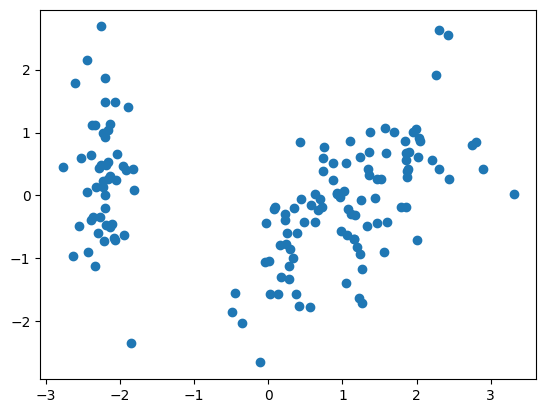

In [6]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1])
plt.show()

## Construct Dendogram

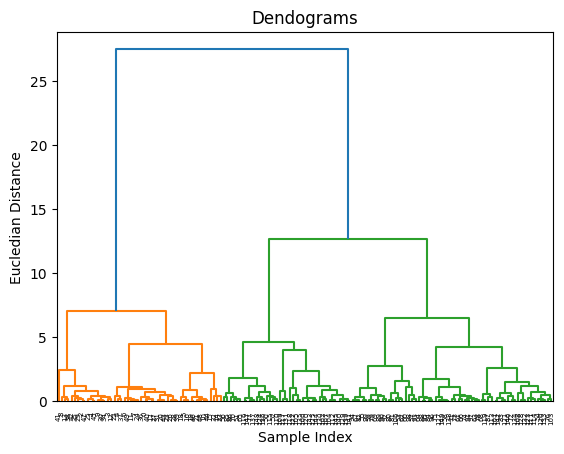

In [7]:
import scipy.cluster.hierarchy as sc
sc.dendrogram(sc.linkage(pca_scaled, method="ward"))

plt.title("Dendograms")
plt.xlabel("Sample Index")
plt.ylabel("Eucledian Distance")
plt.show()

# AgglomerativeClustering

In [8]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
cluster.fit(pca_scaled)

df['cluster']  = cluster.labels_
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
17,5.1,3.5,1.4,0.3,1
103,6.3,2.9,5.6,1.8,0
82,5.8,2.7,3.9,1.2,0
101,5.8,2.7,5.1,1.9,0
100,6.3,3.3,6.0,2.5,0


# Performance Metrics

In [9]:
from sklearn.metrics import silhouette_score

def Silhouette_score(start, last, X):
    silhouette_coefficients = []
    for k in range(start, last):
        agglo = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="ward")
        agglo.fit(X)
        score = silhouette_score(X, agglo.labels_)
        silhouette_coefficients.append(score)

    plt.plot(range(start, last), silhouette_coefficients)
    plt.xticks(range(start, last))
    plt.xlabel("Number of Cluster")
    plt.ylabel("Silhoutte Coefficient")
    plt.show()

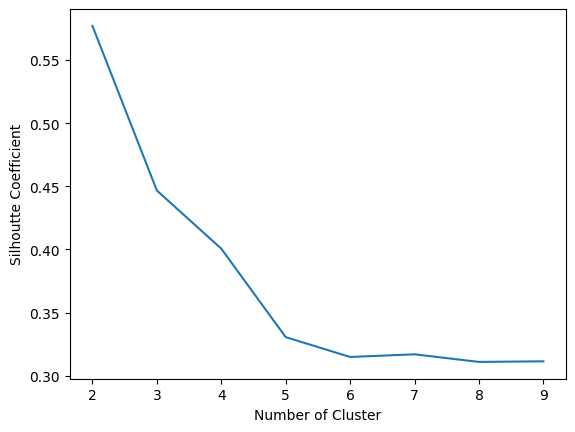

In [10]:
Silhouette_score(2, 10, df_scaled)  # Start = 2